In [36]:
import pandas as pd

In [37]:
df = pd.read_csv(r"D:\Study\github\Diamond_Price_Prediction\notebooks\data\gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


no missing values found

In [38]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [39]:
df.drop('id', inplace=True, axis=1)

Id features is not important we can drop it

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


check for duplicates record

In [41]:
df.duplicated().sum()

0

In [42]:
# segragate numerical and categorical features
numerical_columns = df.columns[df.dtypes!="object"]
categorical_columns = df.columns[df.dtypes=="object"]

print(f"numerical columns --> {numerical_columns}")
print(f"categorical columns --> {categorical_columns}")

numerical columns --> Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical columns --> Index(['cut', 'color', 'clarity'], dtype='object')


In [43]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [44]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [45]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [46]:
df["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

hist plot

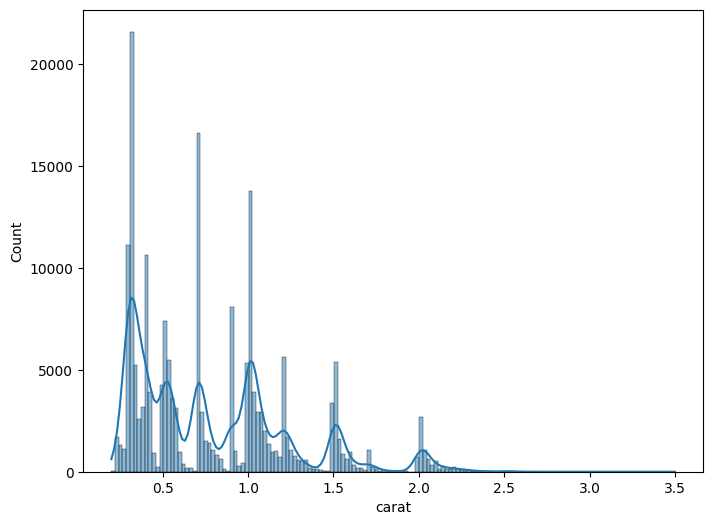

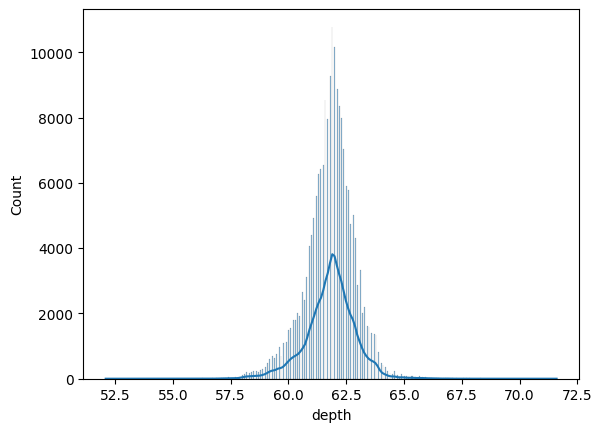

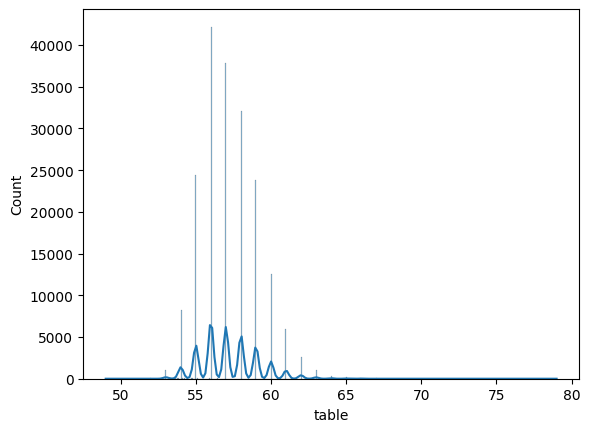

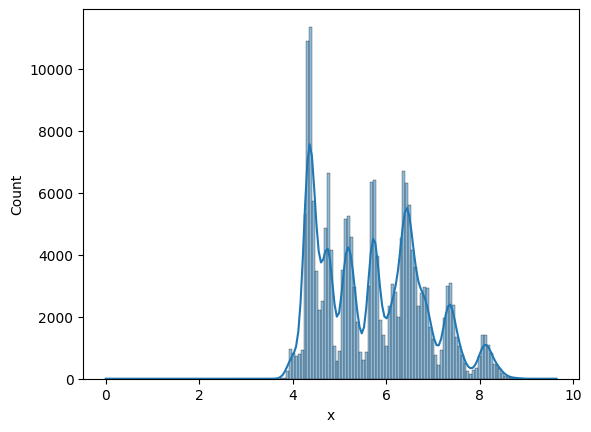

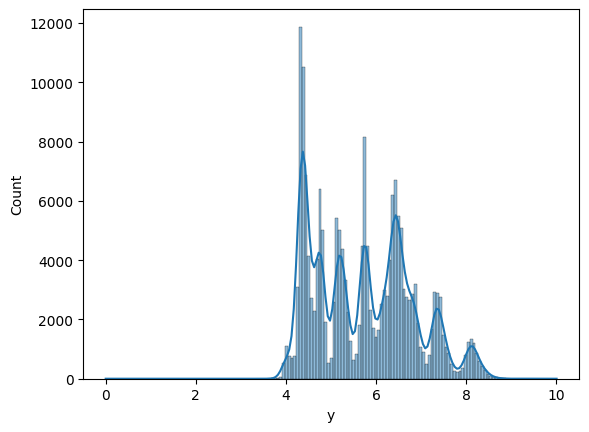

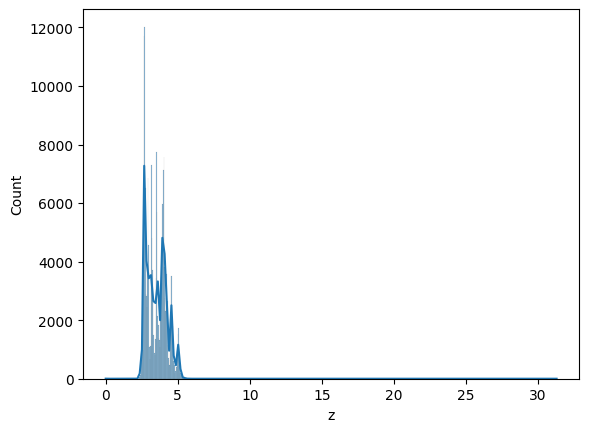

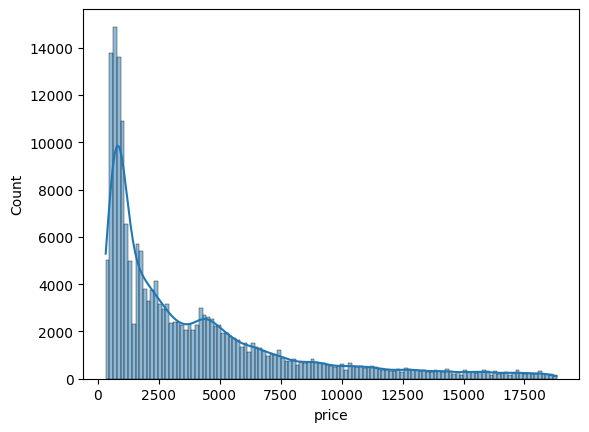

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x = 0
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print("\n")
    plt.show()


<Figure size 800x600 with 0 Axes>

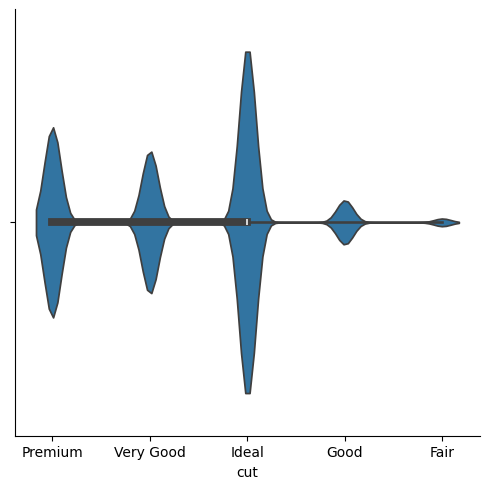

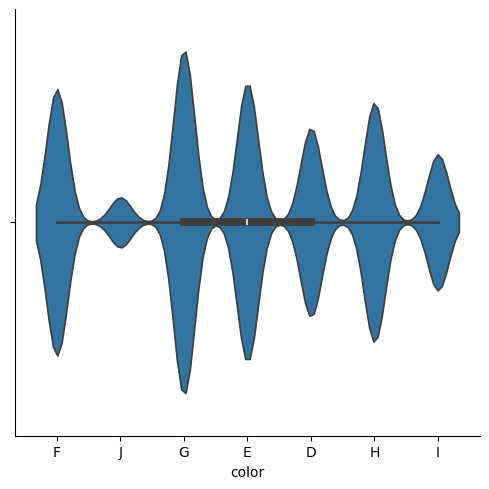

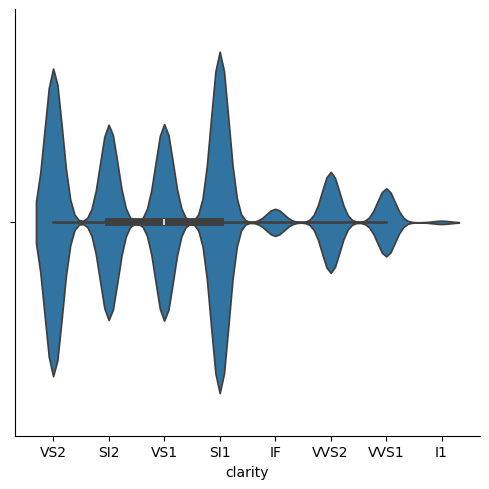

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x = 0
for i in categorical_columns:
    sns.catplot(data=df, x=i,kind="violin")
    print("\n")
    plt.show()


<Axes: >

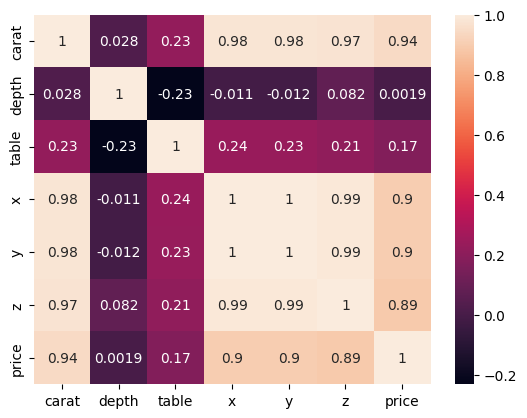

In [49]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

In [52]:
# df.drop(labels = ["x","y", "z"], axis=1)

In [53]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [54]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [55]:
cut_map = {"Fair" : 1, "Good" : 2, 
           "Very Good" : 3, "Premium" : 4, "Ideal" : 5}

In [56]:
df["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [57]:
clarity_map = {'VS2' : 4, 'SI2' : 2, 'VS1' : 5, 'SI1' : 3, 'IF' : 8, 'VVS2' : 6, 'VVS1' : 7, 'I1' : 1}

In [58]:
df["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [59]:
color_map ={'F' :3 , 'J':7, 'G': 4, 'E' : 2, 'D' : 1, 'H' : 5, 'I' : 6}

In [61]:
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df["clarity"].map(clarity_map)
df["color"] = df["color"].map(color_map)

In [62]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
